In [24]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)


## Step 1: Load ALL data again. Create regression model to predict amount donated 

In [2]:
data = pd.read_csv('data_with_predictions.csv')

In [3]:
data

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D,Predicted_Target
0,1,47.000000,3,3,0,0,31,33,31,2,6,2,3,2524,858,1139,99,0,0,48,52,96,0,0,2,6,1,1,0,0,1,0,0,4,0,0,1,52,58,59,48,54,56,14,39,39,22,6,11,14,14,22,24,10,17,15,33,20,15,44,9,40,19,58,23,12,4,1,72,8,6,14,154,222,85,47,1,15,14,9,0,0,0,3531,3801,7,7,81,19,56,44,86,17,75,69,13,84,16,4,1,3,12,16,6,10,44,41,0,0,0,90,97,99,99,99,60,3,60,58,59,13,2,9,6,0,3,7,9,0,96,96,96,96,6780.0,577.0,804.0,744,880,812,902,50146,6,7,13,9,15,14,9,6,21,3,6,10,7,15,14,12,7,25,45,3,69,4,57,43,9,78,11,1,1,0,0,0,1,9,0,10,14,20,6,45,47,58,36,58,31,56,39,99,99,0,22,26,0,22,7,0,1,9,3,9,0,1,0,4,0,11,5,3,2,2,18,15,5,7,4,7,6,9,2,2,1,0,17,69,11,0,142,2,6,17,35,6,22,12,4,13,2,7,8,0,0,0,23,47,1,13,23,75,0,0,7,1,9,0,0,5,3,2,1,0,1,2,2,0,13,33,85,5,1,10,99,74,20,4,10,2,23,45,76,94,6,10,0,78,0,22,0,0,0,98,2,96,99,99,19,4,7,12,19,43,4,8,170.0,7,4,5.0,35.0,25.0,13,24.285714,173676,1,1,11,CA,38,H,M,1,L,G,A,T,2,86,1,51,1,87,7,92,4,95,11,87,7,0,0.0,0
1,0,51.000000,5,3,3,2,12,15,40,11,0,2,3,4093,994,1574,99,0,0,49,51,69,2,0,20,21,0,1,1,6,10,1,0,10,0,1,10,31,37,40,33,41,45,24,38,41,20,15,28,22,14,8,7,6,17,15,33,21,14,21,8,16,29,28,42,28,11,5,49,12,7,33,173,259,14,8,4,85,81,75,0,0,0,2098,2230,6,6,12,88,95,5,0,34,63,47,27,81,19,7,2,5,21,26,7,14,44,11,0,1,0,56,85,94,99,99,13,29,4,32,32,14,8,32,54,0,8,9,70,0,81,95,97,99,4480.0,13.0,803.0,305,311,352,368,13564,26,15,17,18,16,5,1,1,1,28,12,17,18,15,7,1,1,1,14,24,28,21,78,22,36,71,16,5,5,0,0,0,5,3,0,5,26,31,8,75,61,71,52,61,48,33,26,46,67,25,9,21,5,11,24,0,2,6,0,12,8,1,1,0,0,8,19,2,1,6,12,17,6,2,2,7,4,10,4,11,0,2,5,77,6,0,120,12,17,25,21,6,15,5,4,27,1,20,10,1,2,0,7,12,1,15,21,40,22,0,2,0,3,0,0,3,2,0,0,0,1,1,0,0,56,25,34,13,19,34,84,38,6,2,18,0,29,49,54,68,32,6,9,81,5,13,0,0,1,99,0,98,99,98,12,2,4,6,23,61,6,14,79.0,13,7,3.0,10.0,10.0,3,6.076923,148022,0,2,31,CA,4,H,F,3,L,E,A,U,2,90,1,46,8,90,8,93,12,96,2,90,4,1,10.0,1
2,0,64.000000,4,6,2,0,23,12,55,4,3,1,9,1543,314,893,99,0,0,40,60,97,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,40,47,51,46,52,54,14,48,35,16,8,24,15,9,7,12,25,19,22,30,17,12,45,34,45,56,28,16,8,3

In [4]:
len(data[data['TARGET_B']==data['Predicted_Target']])/len(data)

0.9897706787406196

## Step 2: Subset data to include ONLY where Target_B = 1.

In [5]:
subset = data[data['Predicted_Target'] == 1]
subset

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D,Predicted_Target
1,0,51.000000,5,3,3,2,12,15,40,11,0,2,3,4093,994,1574,99,0,0,49,51,69,2,0,20,21,0,1,1,6,10,1,0,10,0,1,10,31,37,40,33,41,45,24,38,41,20,15,28,22,14,8,7,6,17,15,33,21,14,21,8,16,29,28,42,28,11,5,49,12,7,33,173,259,14,8,4,85,81,75,0,0,0,2098,2230,6,6,12,88,95,5,0,34,63,47,27,81,19,7,2,5,21,26,7,14,44,11,0,1,0,56,85,94,99,99,13,29,4,32,32,14,8,32,54,0,8,9,70,0,81,95,97,99,4480.0,13.0,803.0,305,311,352,368,13564,26,15,17,18,16,5,1,1,1,28,12,17,18,15,7,1,1,1,14,24,28,21,78,22,36,71,16,5,5,0,0,0,5,3,0,5,26,31,8,75,61,71,52,61,48,33,26,46,67,25,9,21,5,11,24,0,2,6,0,12,8,1,1,0,0,8,19,2,1,6,12,17,6,2,2,7,4,10,4,11,0,2,5,77,6,0,120,12,17,25,21,6,15,5,4,27,1,20,10,1,2,0,7,12,1,15,21,40,22,0,2,0,3,0,0,3,2,0,0,0,1,1,0,0,56,25,34,13,19,34,84,38,6,2,18,0,29,49,54,68,32,6,9,81,5,13,0,0,1,99,0,98,99,98,12,2,4,6,23,61,6,14,79.0,13,7,3.0,10.0,10.0,3,6.076923,148022,0,2,31,CA,4,H,F,3,L,E,A,U,2,90,1,46,8,90,8,93,12,96,2,90,4,1,10.0,1
4,14002,61.611649,1,2,0,87,7,14,2,3,6,33,1,11662,1969,2014,99,0,0,66,34,68,17,1,7,13,0,1,0,3,0,0,0,7,2,0,3,21,24,30,20,27,32,31,59,33,8,49,38,11,1,0,0,0,26,25,32,11,6,1,0,0,2,12,86,67,24,6,51,4,0,45,340,383,67,16,2,32,30,7,34,0,34,3500,3500,5,2,0,99,99,1,0,85,98,94,82,65,35,3,2,2,2,0,0,19,49,0,5,12,0,99,99,99,99,99,99,1,52,52,55,24,7,32,0,0,67,25,7,0,16,27,34,34,3320.0,0.0,744.0,269,264,292,285,8815,8,35,33,14,9,1,0,0,0,9,36,33,14,8,0,0,0,0,0,1,29,4,98,2,94,35,19,1,1,0,0,1,39,5,11,0,9,14,3,23,87,99,54,99,51,44,46,34,99,1,10,8,5,17,19,0,4,26,2,3,1,1,4,3,0,1,1,0,0,1,25,4,9,4,2,11,6,12,20,1,5,37,5,44,8,0,129,1,4,37,37,7,11,2,4,24,5,16,8,70,93,8,4,4,7,10,0,0,88,1,3,1,8,0,0,5,2,0,1,0,0,1,0,0,5,8,87,7,4,2,99,41,2,2,28,0,0,0,0,0,0,0,0,1,0,31,0,0,0,99,0,99,99,99,0,0,0,0,11,25,2,5,86.0,16,12,5.0,10.0,5.0,4,5.375000,188734,1,4,40,other,39,U,other,3,L,D,B,T,2,92,1,0,2,96,1,92,1,96,1,92,1,1,5.0,1
28,2,56.000000,1,9,0,0,24,36,27,7,9,2,9,12568,3290,4273,0,35,65,48,52,44,55,0,0,1,0,0,0,0,0,0,0,0,0,0,0,32,42,45,34,45,49,30,37,41,22,13,20,21,15,13,12,7,15,15,33,21,15,29,11,26,21,29,50,32,15,8,52

In [6]:
len(subset[subset['TARGET_B']==subset['Predicted_Target']])/len(subset)

0.9981963411491883

## Step 3: Train Test Split then encode and scale.

In [17]:
X = subset.drop(columns=['TARGET_B', 'TARGET_D', 'Predicted_Target'])
y = subset['TARGET_D']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X_train.select_dtypes(exclude=['object']).columns.tolist()

In [19]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OrdinalEncoder(), categorical_cols)])

## Step 4: Continue with Feature Selection.

In [20]:
estimator_for_selection = RandomForestRegressor(random_state=42, n_jobs=-1)
selector_for_regression = RFECV(estimator=estimator_for_selection, step=5, cv=3, verbose = 3)

## Step 5: Run Regressor Model on data. Target_D.

In [21]:
regressor = RandomForestRegressor(random_state=42, verbose = 3, n_jobs=-1)

pipeline_for_regression = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selector', selector_for_regression),
    ('regressor', regressor)
])

In [22]:
%%time
pipeline_for_regression.fit(X_train, y_train)

Fitting estimator with 337 features.
Fitting estimator with 332 features.
Fitting estimator with 327 features.
Fitting estimator with 322 features.
Fitting estimator with 317 features.
Fitting estimator with 312 features.
Fitting estimator with 307 features.
Fitting estimator with 302 features.
Fitting estimator with 297 features.
Fitting estimator with 292 features.
Fitting estimator with 287 features.
Fitting estimator with 282 features.
Fitting estimator with 277 features.
Fitting estimator with 272 features.
Fitting estimator with 267 features.
Fitting estimator with 262 features.
Fitting estimator with 257 features.
Fitting estimator with 252 features.
Fitting estimator with 247 features.
Fitting estimator with 242 features.
Fitting estimator with 237 features.
Fitting estimator with 232 features.
Fitting estimator with 227 features.
Fitting estimator with 222 features.
Fitting estimator with 217 features.
Fitting estimator with 212 features.
Fitting estimator with 207 features.
F

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.1s


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.1s finished


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['TCODE', 'AGE', 'INCOME',
                                                   'WEALTH1', 'HIT', 'MALEMILI',
                                                   'MALEVET', 'VIETVETS',
                                                   'WWIIVETS', 'LOCALGOV',
                                                   'STATEGOV', 'FEDGOV',
                                                   'WEALTH2', 'POP901',
                                                   'POP902', 'POP903',
                                                   'POP90C1', 'POP90C2',
                                                   'POP90C3', 'POP90C4',
                                                   'POP90C5', 'ETH1', 'ETH2',
                                                   'ETH3', 'ETH4', 'ETH5',
                                                   'ETH6', 'ETH7', 'ETH8',
                                                   'ETH9', ...]),
                                                 ('cat', OrdinalEncoder(),
                                                  ['STATE', 'HOMEOWNR',
                                                   'GENDER', 'RFA_2R', 'RFA_2A',
                                                   'GEOCODE2', 'DOMAIN_A'])])),
                ('feature_selector',
                 RFECV(cv=3,
                       estimator=RandomForestRegressor(n_jobs=-1,
                                                       random_state=42),
                       step=5, verbose=3)),
                ('regressor',
                 RandomForestRegressor(n_jobs=-1, random_state=42, verbose=3))])

In [26]:
y_pred = pipeline_for_regression.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 4.397830501930502
Mean Squared Error: 55.181562042947235
R2 Score: 0.5012134725357097


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


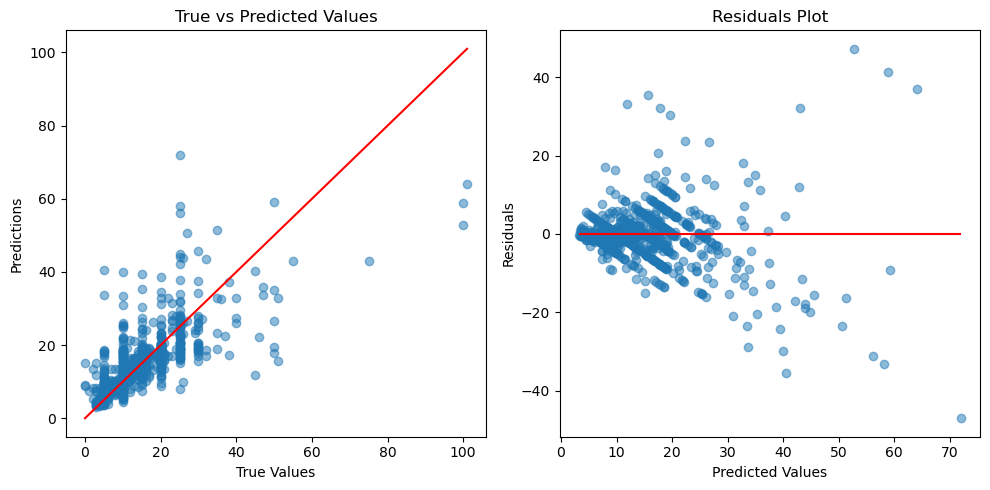

In [29]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') 
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(0, min(y_pred), max(y_pred), color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

plt.tight_layout()
plt.show()

In [ ]:
# param_grid = {
#     'regressor__n_estimators': [50, 100, 150],
#     'regressor__max_features': ['auto', 'sqrt'],
#     'regressor__max_depth': [10, 20, 30, None],
#     'regressor__min_samples_split': [2, 5, 10],
#     'regressor__min_samples_leaf': [1, 2, 4],
#     'regressor__bootstrap': [True, False]
# }

# grid_search = GridSearchCV(pipeline_for_regression, param_grid, cv=3, 
#                            scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# print("Best hyperparameters:\n", best_params)

# best_regressor = grid_search.best_estimator_

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'regressor__n_estimators': randint(10, 200),
    'regressor__max_features': ['auto', 'sqrt', 'log2'],
    'regressor__max_depth': [None] + list(randint(1, 20).rvs(5)),  
    'regressor__min_samples_split': randint(2, 11),  
    'regressor__min_samples_leaf': randint(1, 11),  
    'regressor__bootstrap': [True, False]
}

random_search = RandomizedSearchCV(pipeline_for_regression, param_distributions=param_dist, 
                                   n_iter=100, scoring='neg_mean_squared_error', 
                                   n_jobs=-1, cv=3, verbose=2, random_state=42)

random_search.fit(X_train, y_train_regressor)

print("Best hyperparameters:\n", random_search.best_params_)

best_regressor = random_search.best_estimator_


In [ ]:
y_pred = best_regressor.predict(X_test)

mae = mean_absolute_error(y_test_regressor, y_pred)
mse = mean_squared_error(y_test_regressor, y_pred)
r2 = r2_score(y_test_regressor, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

feature_importances = best_regressor.named_steps['regressor'].feature_importances_



In [ ]:
import joblib
filename = 'best_regressor_model.pkl'
joblib.dump(best_regressor, filename)